# Capstone Data Wrangling and EDA

## Imports

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import spacy
import scattertext

In [4]:
from nltk import corpus

In [5]:
import numpy as np
from glob import glob

# 1. Load Data

In [6]:
df = pd.read_csv('yelp_Restaurant_reviews.csv')

In [7]:
df.head().T

,0,1,2,3,4
business_id,PBPodbdtLyuQ-sNgOWwkVw,PBPodbdtLyuQ-sNgOWwkVw,PBPodbdtLyuQ-sNgOWwkVw,PBPodbdtLyuQ-sNgOWwkVw,PBPodbdtLyuQ-sNgOWwkVw
name,Mr Sushi Express,Mr Sushi Express,Mr Sushi Express,Mr Sushi Express,Mr Sushi Express
address,"5770 W Irlo Bronson Memorial Hwy, Ste 157","5770 W Irlo Bronson Memorial Hwy, Ste 157","5770 W Irlo Bronson Memorial Hwy, Ste 157","5770 W Irlo Bronson Memorial Hwy, Ste 157","5770 W Irlo Bronson Memorial Hwy, Ste 157"
city,Kissimmee,Kissimmee,Kissimmee,Kissimmee,Kissimmee
state,FL,FL,FL,FL,FL
postal_code,34746,34746,34746,34746,34746
latitude,28.3313,28.3313,28.3313,28.3313,28.3313
longitude,-81.5158,-81.5158,-81.5158,-81.5158,-81.5158
stars,4,4,4,4,4
review_count,168,168,168,168,168


# 2. Data Wrangling

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4921128 entries, 0 to 4921127
Data columns (total 20 columns):
 #   Column        Dtype  
---  ------        -----  
 0   business_id   object 
 1   name          object 
 2   address       object 
 3   city          object 
 4   state         object 
 5   postal_code   object 
 6   latitude      float64
 7   longitude     float64
 8   stars         float64
 9   review_count  int64  
 10  is_open       int64  
 11  attributes    object 
 12  categories    object 
 13  hours         object 
 14  user_id       object 
 15  review_stars  int64  
 16  funny         int64  
 17  cool          int64  
 18  text          object 
 19  date          object 
dtypes: float64(3), int64(5), object(12)
memory usage: 750.9+ MB


### Visualize a distribution of rating

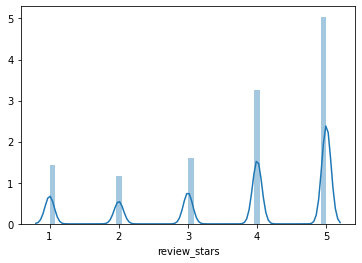

In [10]:
sns.distplot(df['review_stars']);

## Assign "rating" groups to Low and High

In [11]:
df['rating'] = df['review_stars'].replace(
                {1: 'Low Rating', 2: 'Low Rating', 3: 'Low Rating',
                 4: 'High Rating', 5: 'High Rating'})

In [12]:
df['fun_meter'] = df['funny'].replace(
                    {0: 'Not Funny', 1: 'Funny'})

In [13]:
df.head(2).T

,0,1
business_id,PBPodbdtLyuQ-sNgOWwkVw,PBPodbdtLyuQ-sNgOWwkVw
name,Mr Sushi Express,Mr Sushi Express
address,"5770 W Irlo Bronson Memorial Hwy, Ste 157","5770 W Irlo Bronson Memorial Hwy, Ste 157"
city,Kissimmee,Kissimmee
state,FL,FL
postal_code,34746,34746
latitude,28.3313,28.3313
longitude,-81.5158,-81.5158
stars,4,4
review_count,168,168


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4921128 entries, 0 to 4921127
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   business_id   object 
 1   name          object 
 2   address       object 
 3   city          object 
 4   state         object 
 5   postal_code   object 
 6   latitude      float64
 7   longitude     float64
 8   stars         float64
 9   review_count  int64  
 10  is_open       int64  
 11  attributes    object 
 12  categories    object 
 13  hours         object 
 14  user_id       object 
 15  review_stars  int64  
 16  funny         int64  
 17  cool          int64  
 18  text          object 
 19  date          object 
 20  rating        object 
 21  fun_meter     object 
dtypes: float64(3), int64(5), object(14)
memory usage: 826.0+ MB


# 3. Exploratory Data Analysis

### 3.1. Vizualize correlation between Business Rating Scores and 'Funny' Reviews

#### Let's take a look at 'revew_stars' and 'funny' correlation:

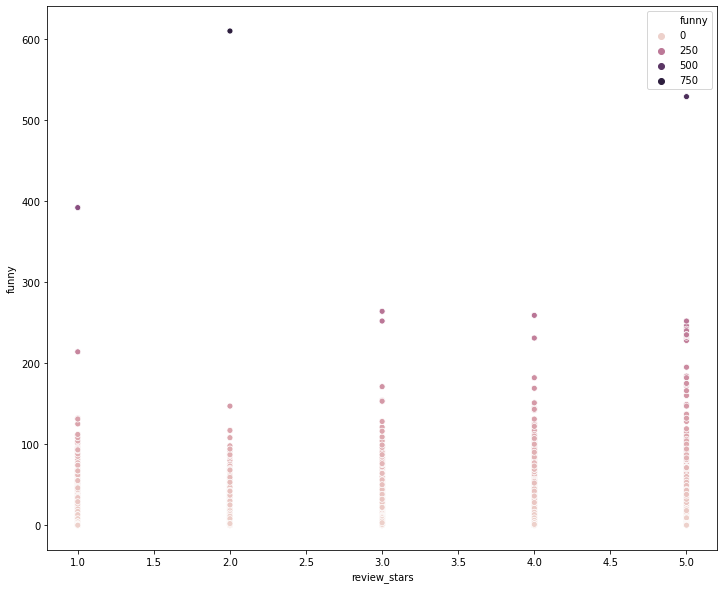

In [23]:
plt.figure(figsize=(12, 10))
_ = sns.scatterplot(x='review_stars', y='funny', hue='funny', data=df)

And sure enough, it looks like the lower the ratings, the higher chances there is a funny review.

### Another chart to confirm the correlation:

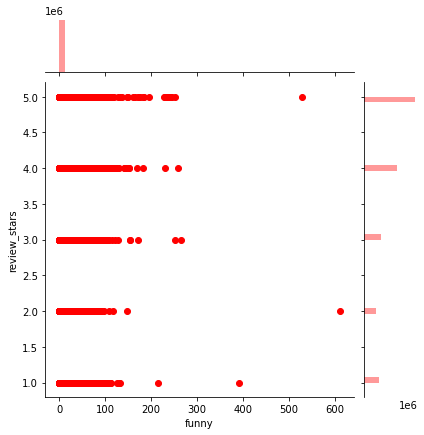

In [24]:
sns.jointplot(x=df['funny'], y=df['review_stars'], color='Red');

### For fun, let's look at restaurants that have 'Low Ratings'

In [26]:
df_low_rests = df[df['rating']=='Low Rating']

In [27]:
df.shape, df_low_rests.shape

((4921128, 22), (1649822, 22))

### Drop random rows from df_fun_rests dataframe to optimize for memory - reduce to 5%

In [28]:
# df_fun_rests = df_fun_rests.sample(frac=0.005, replace=True, random_state=1)

df_fun_rests = df.sample(frac=0.0005, replace=True, random_state=1)

In [29]:
df_fun_rests.shape

(2461, 22)

## NLP Analysis with Scattertext and spaCy

In [83]:
nlp = spacy.load('en_core_web_sm')

### Term Frequency Function

In [84]:
def term_freq(df_yelp):
    corpus = (scattertext.CorpusFromPandas(df_yelp,
                                           category_col='fun_meter', 
                                           text_col='text',
                                           nlp=nlp)
              .build()
              .remove_terms(nlp.Defaults.stop_words, ignore_absences=True)
              )
    df = corpus.get_term_freq_df()
    df['Funny_Score'] = corpus.get_scaled_f_scores('Funny')
    df['Not_Funny_Score'] = corpus.get_scaled_f_scores('Not Funny')
    df['Funny_Score'] = round(df['Funny_Score'], 2)
    df['Not_Funny_Score'] = round(df['Not_Funny_Score'], 2)
    
    df_high = df.sort_values(by='Funny freq', 
                             ascending = False).reset_index()
    df_low = df.sort_values(by='Not Funny freq', 
                            ascending=False).reset_index()
    return df_high, df_low

In [85]:
Restrns_fun, Restrns_meh = term_freq(df_fun_rests)

In [86]:
Restrns_fun.head(10)

,term,Not Funny freq,Funny freq,3 freq,2 freq,5 freq,4 freq,6 freq,14 freq,10 freq,7 freq,9 freq,8 freq,15 freq,12 freq,24 freq,Funny_Score,Not_Funny_Score
0,food,1372,251,31,59,10,11,2,1,3,0,3,2,2,1,0,0.08,0.93
1,good,1241,197,38,49,13,16,5,2,1,1,1,0,0,0,2,0.07,0.93
2,place,1042,175,25,36,4,12,4,1,3,3,6,0,0,0,1,0.07,0.93
3,it was,771,154,27,31,11,18,3,2,2,1,0,0,0,0,0,0.81,0.91
4,like,587,154,21,43,11,10,3,4,5,3,3,2,0,2,1,0.83,0.15
5,of the,581,126,34,40,15,8,3,7,2,0,1,0,0,2,0,0.81,0.16
6,and the,634,119,18,25,7,10,3,1,2,1,2,0,0,0,0,0.08,0.92
7,great,949,117,19,29,3,4,0,0,4,2,0,0,0,0,2,0.05,0.95
8,it 's,562,110,24,27,7,17,4,3,0,5,1,0,0,0,0,0.08,0.90
9,the food,520,109,10,22,5,4,1,1,1,0,1,0,0,0,0,0.82,0.92


In [87]:
Restrns_meh.head(10)

,term,Not Funny freq,Funny freq,3 freq,2 freq,5 freq,4 freq,6 freq,14 freq,10 freq,7 freq,9 freq,8 freq,15 freq,12 freq,24 freq,Funny_Score,Not_Funny_Score
0,food,1372,251,31,59,10,11,2,1,3,0,3,2,2,1,0,0.08,0.93
1,good,1241,197,38,49,13,16,5,2,1,1,1,0,0,0,2,0.07,0.93
2,place,1042,175,25,36,4,12,4,1,3,3,6,0,0,0,1,0.07,0.93
3,great,949,117,19,29,3,4,0,0,4,2,0,0,0,0,2,0.05,0.95
4,it was,771,154,27,31,11,18,3,2,2,1,0,0,0,0,0,0.81,0.91
5,service,704,98,18,30,3,5,1,1,2,1,2,0,0,0,0,0.06,0.94
6,and the,634,119,18,25,7,10,3,1,2,1,2,0,0,0,0,0.08,0.92
7,like,587,154,21,43,11,10,3,4,5,3,3,2,0,2,1,0.83,0.15
8,of the,581,126,34,40,15,8,3,7,2,0,1,0,0,2,0,0.81,0.16
9,it 's,562,110,24,27,7,17,4,3,0,5,1,0,0,0,0,0.08,0.90


In [89]:
corpus_dataframe = df_fun_rests

In [95]:
df_fun_rests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2461 entries, 4322341 to 847914
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   2461 non-null   object 
 1   name          2461 non-null   object 
 2   address       2455 non-null   object 
 3   city          2461 non-null   object 
 4   state         2461 non-null   object 
 5   postal_code   2461 non-null   object 
 6   latitude      2461 non-null   float64
 7   longitude     2461 non-null   float64
 8   stars         2461 non-null   float64
 9   review_count  2461 non-null   int64  
 10  is_open       2461 non-null   int64  
 11  attributes    2458 non-null   object 
 12  categories    2461 non-null   object 
 13  hours         2359 non-null   object 
 14  user_id       2461 non-null   object 
 15  review_stars  2461 non-null   int64  
 16  funny         2461 non-null   int64  
 17  cool          2461 non-null   int64  
 18  text          2461 n

## Prepare CSV File for the prediction model

In [106]:
yelp = df_fun_rests[['name','review_stars','rating', 'funny', 'text']]

In [107]:
yelp[yelp['funny']>0].head()

,name,review_stars,rating,funny,text
188317,Sweet Spot,5,High Rating,1,I've been to Sweet Spot a couple times with my...
4490326,Sunshine Tavern,4,High Rating,3,Came here after a good hike with a few girlfri...
323900,Stephanie's On Newbury,2,Low Rating,1,So.. we came here for a lunch after hearing ra...
4551944,Blue Ginger,2,Low Rating,2,Maybe it's because I've heard so much about th...
1225219,Highland Bakery,3,Low Rating,1,This place was kind of a lack luster experienc...


## Tokenize

In [116]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# remove additional words from token
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [117]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [127]:
yelp.head(3).T

,4322341,4686059,3937352
name,Fado Irish Pub,McCormick & Schmick's Seafood & Steaks,Café Margaux
review_stars,5,2,5
rating,High Rating,Low Rating,High Rating
funny,0,0,0
text,So while working in the area and having to be ...,I had lunch outside at McCormick & Schmick's. ...,Another amazing Margaux experience! From the p...
tokens,"[working, area, having, work, thought, walk, e...","[lunch, outside, mccormick, schmick, ordered, ...","[amazing, margaux, experience, panko, encruste..."


In [125]:
yelp['tokens'].head()

4322341    [working, area, having, work, thought, walk, e...
4686059    [lunch, outside, mccormick, schmick, ordered, ...
3937352    [amazing, margaux, experience, panko, encruste...
491263     [order, brisket, server, chopped, sliced, orde...
4267653    [good, speed, service, insanely, overpriced, g...
Name: tokens, dtype: object

## Classification

In [128]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer # Term frequency (TF) - Inverse Document Frequency (IDF)

In [129]:
# Instances for pipeline
sgdc = SGDClassifier()
rfc = RandomForestClassifier()
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

In [143]:
funny_yelp = yelp[yelp['rating']=='Low Rating']

In [156]:
# Specify the pipeline

pipe = Pipeline([('vect', vect), ('rfc', rfc)])

# pipe = Pipeline([('vect', vect), ('clf', sgdc)])
pipe.fit(funny_yelp['text'], funny_yelp['funny'])

Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('rfc', RandomForestClassifier())])

In [146]:
funny_yelp[funny_yelp['funny']>0].head(50)

,name,review_stars,rating,funny,text,tokens
323900,Stephanie's On Newbury,2,Low Rating,1,So.. we came here for a lunch after hearing ra...,"[came, lunch, hearing, raving, reviews, experi..."
4551944,Blue Ginger,2,Low Rating,2,Maybe it's because I've heard so much about th...,"[maybe, ve, heard, place, long, blue, ginger, ..."
1225219,Highland Bakery,3,Low Rating,1,This place was kind of a lack luster experienc...,"[place, kind, lack, luster, experience, servic..."
1844560,Bon Me,2,Low Rating,3,"Growing up in LA near Chinatown, you have a va...","[growing, la, near, chinatown, variety, cheap,..."
3050093,Maudie's Too,3,Low Rating,1,We went to Maudie's because my friend who used...,"[went, maudie, friend, live, austin, loves, ma..."
619817,Watch City Brewing Co,3,Low Rating,2,"This place really really needs to be awesome, ...","[place, needs, awesome, brew, pub, favorite, n..."
510148,Tacodeli,2,Low Rating,3,"Ehh, the tacos were good but this place was de...","[ehh, tacos, good, place, definitely, look, ta..."
2711070,Tavern 42,1,Low Rating,1,Stopped by tonight at 9:10 pm and was told the...,"[stopped, tonight, pm, told, kitchen, closed, ..."
4448583,Octane Westside,3,Low Rating,1,"came here to study (yes, actually study) on a ...","[came, study, yes, actually, study, weekday, a..."
475111,Por Qué No? Taqueria,2,Low Rating,1,Overrated. Not worth the line. If you've never...,"[overrated, worth, line, ve, lengua, tacos, ll..."


In [157]:
my_review = ["creative minds that brought"]
pipe.predict(my_review)[0]

0

## Pickle the model

In [158]:
import pickle
pickle.dump(pipe, open('yelp_funny_predict.pkl', 'wb'))